✅ Cleaned shape: (22390, 28)

📊 Remaining columns: ['Message', 'Time', 'Longitude', 'Latitude', 'NR_Scan_NR_ARFCN', 'NR_Scan_PCI_SortedBy_RSRP_0', 'NR_Scan_PCI_SortedBy_RSRP_1', 'NR_Scan_PCI_SortedBy_RSRP_2', 'NR_Scan_PCI_SortedBy_RSRP_3', 'NR_Scan_PCI_SortedBy_RSRP_4', 'NR_Scan_PCI_SortedBy_RSRP_5', 'NR_Scan_SSB_RSRP_SortedBy_RSRP_0', 'NR_Scan_SSB_RSRP_SortedBy_RSRP_1', 'NR_Scan_SSB_RSRP_SortedBy_RSRP_2', 'NR_Scan_SSB_RSRP_SortedBy_RSRP_3', 'NR_Scan_SSB_RSRP_SortedBy_RSRP_4', 'NR_Scan_SSB_RSRP_SortedBy_RSRP_5', 'NR_Scan_SSB_RSRQ_SortedBy_RSRP_0', 'NR_Scan_SSB_RSRQ_SortedBy_RSRP_1', 'NR_Scan_SSB_RSRQ_SortedBy_RSRP_2', 'NR_Scan_SSB_RSRQ_SortedBy_RSRP_3', 'NR_Scan_SSB_RSRQ_SortedBy_RSRP_4', 'NR_Scan_SSB_SINR_SortedBy_RSRP_0', 'NR_Scan_SSB_SINR_SortedBy_RSRP_1', 'NR_Scan_SSB_SINR_SortedBy_RSRP_2', 'NR_Scan_SSB_SINR_SortedBy_RSRP_3', 'NR_Scan_SSB_SINR_SortedBy_RSRP_4', 'NR_Scan_SSB_SINR_SortedBy_RSRP_5']

📈 Description:
           Message                           Time     Longitude      L

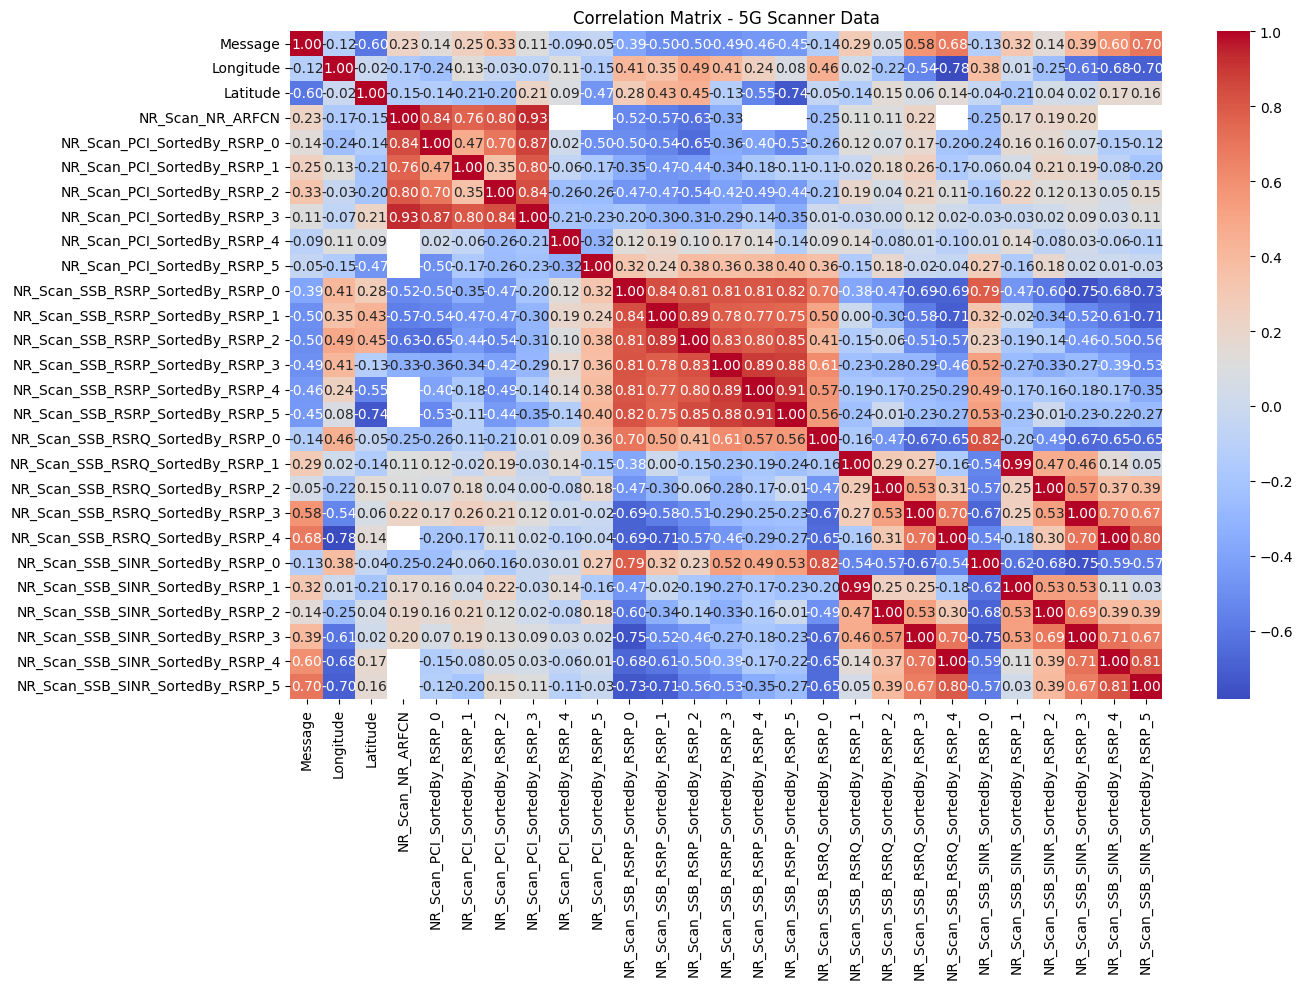

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the Series Formatted Data
file_path = "../data/raw/5G_Scanner.xlsx"
df = pd.read_excel(file_path, sheet_name="Series Formatted Data")

# Step 2: Drop fully empty rows/columns
df.dropna(axis=0, how='all', inplace=True)
df.dropna(axis=1, how='all', inplace=True)

# Step 3: Clean column names
df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace(".", "", regex=False)

# Step 4: Remove rows missing Latitude/Longitude if present
if 'Longitude' in df.columns and 'Latitude' in df.columns:
    df.dropna(subset=['Longitude', 'Latitude'], inplace=True)

# Step 5: Drop columns with 100% missing data
df = df.dropna(axis=1, how='all')

# Step 6: Drop low-information columns (<1% populated)
threshold = 0.01 * len(df)
df = df.dropna(axis=1, thresh=threshold)

# Step 7: Summary
print("✅ Cleaned shape:", df.shape)
print("\n📊 Remaining columns:", df.columns.tolist())
print("\n📈 Description:\n", df.describe())

# Step 8: Correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix - 5G Scanner Data")
plt.tight_layout()
plt.show()
